# Machine Learning: Auscultando las Redes Neuronales con Python
*Tercera semana*\
Tomado de los **modulos 4,5,6** de las notas de Diego Luis Aristizábal R,\
Quantum computing UNAL, Universidad Nacional de Colombia.\
Sergio Quiroga Sandoval

Programación en las siguientes clases:


*   perceptrón simple (Regresión lineal)
*   Perceptrón simple (clasificación binaria y clasificación multiclase).
*   Perceptrón multicapa (Deep learning)

## Regresión Lineal usando Perceptrón Simple
Módulo 5

Se desarrolla un ejemplo con este modelo siguiendo los pasos básicos de aprendizaje:


*   preparación del conjunto de entrenamiento y testeo
*   definición de la función de activación y de la función de pérdida

 Realmente se trata lo más básico. En los módulos posteriores se irá profundizando con más detalles y técnicas.

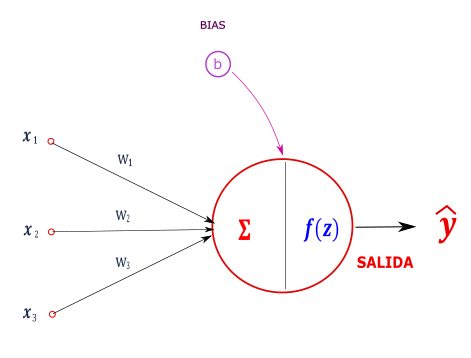

$z = W \cdot x +b$

El algoritmo Perceptrón fue publicado en 1957 por Frank Rosenblatt.\
Uno de los usos del Perceptrón es encontrar un hiperplano capaz de separar correctamente un conjunto de datos que sean linealmente separables, una vez obtenido el hiperplano, este puede utilizarse para clasificaciones binarias.\
También puede usarse para regresión lineal.

Principales aplicaciones del **aprendizaje supervisado**:

*   Clasificación.
*   Regresión.




x:
 [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914]
Shape x:
 (20,)
y:
 [-0.44591308  1.62260416  0.82404809  0.32781486 -1.39789045 -1.23343394
 -1.91782866  1.4718218   0.45066733  0.60551552 -1.8638896   1.71490147
  1.11229636 -0.92620079 -1.03988411 -1.11218329 -0.88072414 -0.10213822
 -0.18010341 -0.86500719]
Shape y:
 (20,)


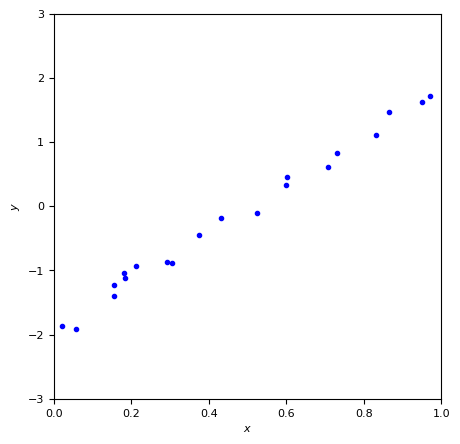

In [ ]:
# Generación del dataset, usando datos aleatorios que se acercan a la función
# y = 4x -2
# esto se usará para ver si podemos usar un perceptrón que infiera
# esta recta a partir de los datos.

import matplotlib.pyplot as plt
import numpy as np

#numero de muestras (samples)
n = 20
np.random.seed(42)                           # concepto importante en computación: reproducibilidad
x = np.random.rand(n)                        # Crea un array of de la forma especificada y lo llena de datos aleatorios en distribución uniforme entre 0 y 1.
y = 4*x - 2 + (np.random.rand(n)- 0.5) * 0.5

print("x:\n",x)
print("Shape x:\n", np.shape(x))
print("y:\n",y)
print("Shape y:\n", np.shape(x))

"""
graficar
"""
fig, ax = plt.subplots(figsize=(5, 5))

ax.set(xlim=(0, 1),  ylim=(-3, 3))
ax.plot(x, y, "b.")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("$x$", fontsize=8)
plt.ylabel("$y$", fontsize=8)  #observe la orientación de la y
#plt.ylabel("$y$", rotation=0, fontsize=8)
# plt.grid(True)
plt.show()

Tomado el dataset anterior el Perceptrón debe predecir que la mejor recta que se ajusta es $y = 4x-2$

El código comienza tomando el dataset y examinando su forma (shape) para luego adaptarla a una forma (shape) adecuada para el tratamiento matricial de los algoritmos de entrenamiento vía retropropagación (bakpropagation)


In [ ]:
#Dataset y formato matricial

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

print("X_train como vector columna:\n",X_train)
print("Shape X_train:\n", np.shape(X_train))
print("y_train como vector columna:\n",y_train)
print("Shape y_train:\n", np.shape(y_train))


X_train como vector columna:
 [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]
 [0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]]
Shape X_train:
 (20, 1)
y_train como vector columna:
 [[-0.44591308]
 [ 1.62260416]
 [ 0.82404809]
 [ 0.32781486]
 [-1.39789045]
 [-1.23343394]
 [-1.91782866]
 [ 1.4718218 ]
 [ 0.45066733]
 [ 0.60551552]
 [-1.8638896 ]
 [ 1.71490147]
 [ 1.11229636]
 [-0.92620079]
 [-1.03988411]
 [-1.11218329]
 [-0.88072414]
 [-0.10213822]
 [-0.18010341]
 [-0.86500719]]
Shape y_train:
 (20, 1)


In [ ]:
#número de perceptrones
k = 1

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 1, k =1
W = np.zeros((m,k))

#bias
#se inicializó en 1
#su forma mx1
b = np.ones((m,1))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion y su derivada
#en este ejemplo es la función Identidad
def identidad(z):
    return z
"""
Utilizar una función de activación identidad es como no utilizar ninguna,
ya que la salida del Perceptrón será directamente el producto de las entradas por los pesos más el bias,
"""
#derivada de la función de activación (dy/dz)
#derivada de la función identidad
def d_identidad(z):
    return 1

#función de pérdida y su derivada
#en este caso es la MSE (Mean Square Error)
def L(y_hat):
    MSE = pow((y_hat - y_train),2).mean()
    return MSE
#dL_dz
def dL(y_hat):
    dL_dy = (2/n)*(y_hat - y_train)
    return dL_dy


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,k))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    MSE = L(y_hat)

    return grad_W.T, grad_b, MSE


"""
ENTRENAMIENTO
"""

#tasa de aprendizaje
eta = 0.5

#número de épcas
epocas = 200

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = identidad(z)
    MSE = L(y_hat)

    return y_hat, MSE


#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, MCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, MCE


def entrenar(W, b, eta, epocas):
    for i in range(0,epocas):
       #valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, MSE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w  # Gradient descent
       b = b - eta*grad_b  # Gradient descent

       #desplegar los valores de la función de pérdida
       print("MSE",MSE)

    return W, b

W, b  = entrenar(W, b, eta, epocas )


pendiente = W[0,0]
intercepto = b[0,0]

print("Pendiente=",pendiente)
print("Intercepto=",intercepto)



MSE 2.678695175268678
MSE 1.4127798111520784
MSE 1.1695245765521316
MSE 1.0037720055513177
MSE 0.8636488804400008
MSE 0.7434416438751579
MSE 0.6402287429077577
MSE 0.5516029487747862
MSE 0.4755024241385681
MSE 0.4101569907579369
MSE 0.35404665864978574
MSE 0.3058662547794609
MSE 0.2644950628798253
MSE 0.22897075461941566
MSE 0.19846700504308518
MSE 0.17227427156620376
MSE 0.14978328942401842
MSE 0.13047089966650893
MSE 0.11388788004610746
MSE 0.09964849573460921
MSE 0.0874215268102588
MSE 0.07692256380689984
MSE 0.06790739211325317
MSE 0.060166311337949384
MSE 0.05351925750402092
MSE 0.04781161461104134
MSE 0.04291061813836393
MSE 0.03870226683195321
MSE 0.03508867094040313
MSE 0.03198577521790579
MSE 0.029321403729326796
MSE 0.027033580977926335
MSE 0.025069090303760967
MSE 0.023382236019913828
MSE 0.021933780492812728
MSE 0.020690031442239833
MSE 0.01962205823087243
MSE 0.018705018913597788
MSE 0.017917582393209012
MSE 0.017241432241343394
MSE 0.01666084064312524
MSE 0.01616230255511

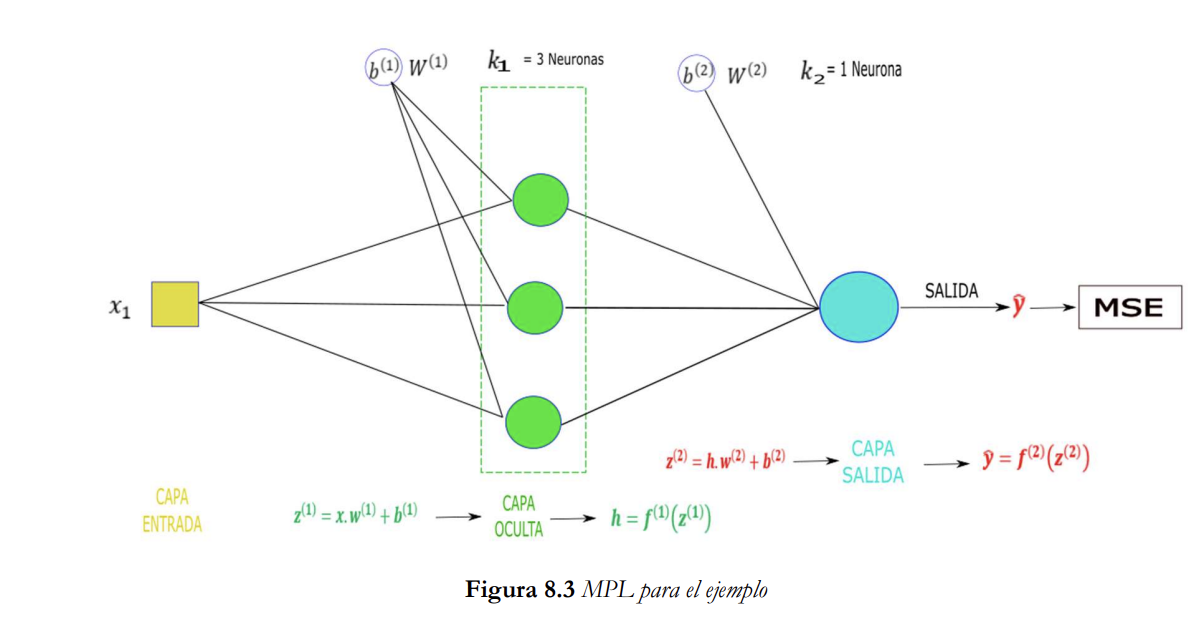Observa cómo desciende la función de pérdida MSE. También se despliegan los valores de la pendiente y el intercepto de la recta predicha.

Los hiperparámetros tasa de aprendizaje $\eta$ y épocas usadas fueron respectivamente 0.5 y 200.

Graficar la recta predicha por el perceptrón

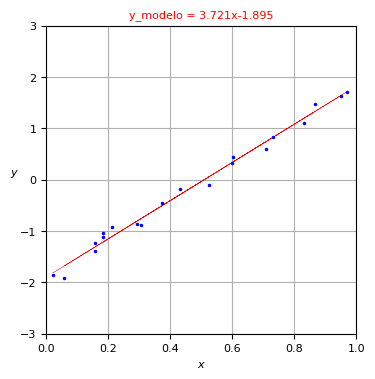

In [ ]:
def visualizar():
    """
    graficar
    """
    fig, ax = plt.subplots(figsize=(4, 4))

    y_hat = pendiente*X_train +intercepto
    ax.set(xlim=(0, 1),  ylim=(-3, 3))
    ax.plot(x, y_hat, "r",linewidth=0.2, linestyle="-")
    ax.plot(x, y_train, "b.",markersize= 3)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.xlabel("$x$", fontsize=8)
    plt.ylabel("$y$", rotation=0, fontsize=8)

    m = str(round(pendiente,3))
    b = str(round(intercepto,3))
    titulo = "y_modelo = " + m+"x" + b

    plt.rc('text', color='red')
    ax.set_title(titulo, fontsize=8)
    plt.grid(True)
    plt.show()

visualizar()

Testeando el modelo

% de error 10.4150548888035


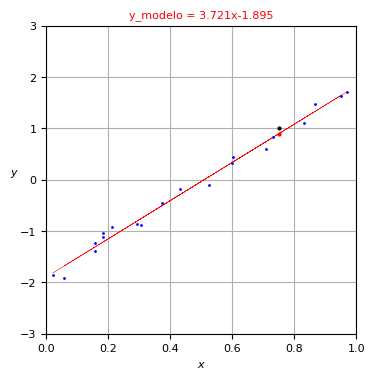

In [ ]:
def visualizar(x_test, y_test, y_real):
    """
    graficar
    """
    fig, ax = plt.subplots(figsize=(4, 4))

    y_hat = pendiente*X_train +intercepto
    ax.set(xlim=(0, 1),  ylim=(-3, 3))
    ax.plot(x, y_hat, "r",linewidth=0.2, linestyle="-")
    ax.plot(x, y_train, "b.", markersize=2)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.xlabel("$x$", fontsize=8)
    plt.ylabel("$y$", rotation=0, fontsize=8)

    #graficar punto resultado con testeo
    plt.plot(x_test, y_test,'r.',markersize=4)
    plt.plot(x_test, y_real,'k.',markersize=4)


    m = str(round(pendiente,3))
    b = str(round(intercepto,3))
    titulo = "y_modelo = " + m+"x" + b

    plt.rc('text', color='red')
    ax.set_title(titulo, fontsize=8)
    plt.grid(True)
    plt.show()
"""
TESTEAR
"""
def testear(x_test):
    y_test = pendiente*x_test + intercepto
    y_real = 4*x_test - 2
    #porcentaje de error
    porcentaje_error = abs(100.0*((y_real-y_test)/y_real))

    return y_test, y_real , porcentaje_error

#testeo
x_test =0.75
y_test, y_real , porcentaje_error  = testear(0.75)

y_test, y_real, porcentaje_error = testear(x_test)

print("% de error", porcentaje_error)

visualizar(x_test, y_test, y_real)

Este es el resultado con una muestra x_test = 0.75, se predice el punto rojo, el valor real es el punto negro.



Interpretación sobre el gradiente descendente.\
Veamos gráficamente cómo disminuye la función de pérdida al actualizar W, b,
Usaremos el codigo que se tiene pero guardaremos los valores de los parámetros en cada época para poder graficar

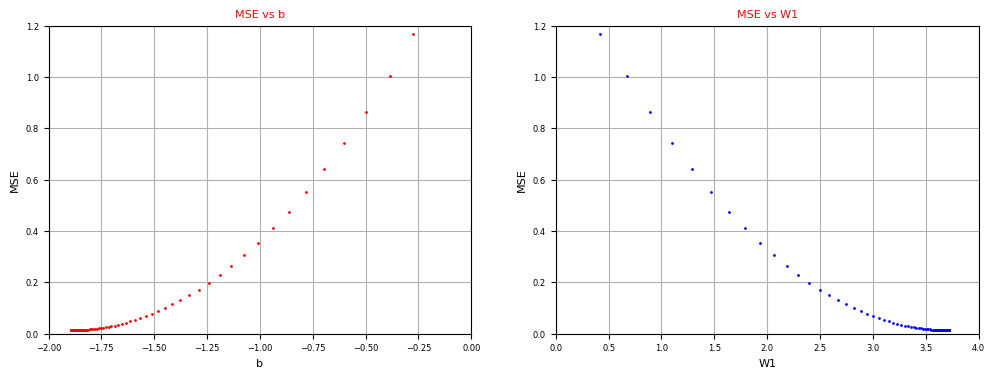

In [ ]:
#app_5.6
import matplotlib.pyplot as plt
import numpy as np


"""
DATASET Y SU PREROCESAMIENTO
"""
#dataset
x = [0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864, 0.15599452,
 0.05808361, 0.86617615, 0.60111501, 0.70807258, 0.02058449, 0.96990985,
 0.83244264, 0.21233911, 0.18182497, 0.18340451, 0.30424224, 0.52475643,
 0.43194502, 0.29122914]

y = [-0.44591308,  1.62260416,  0.82404809,  0.32781486, -1.39789045, -1.23343394,
 -1.91782866,  1.4718218,   0.45066733,  0.60551552, -1.8638896,   1.71490147,
  1.11229636, -0.92620079, -1.03988411, -1.11218329, -0.88072414, -0.10213822,
 -0.18010341, -0.86500719]


#número de perceptrones
k = 1
#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y)
#m:número de características
m = 1

X_train = np.zeros((n,m))
X_train[:,0] = x
y_train = np.zeros((n,1))
y_train[:,0] = y

#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 1, k =1
W = np.zeros((m,k))

#bias
#se inicializó en 1
#su forma mx1
b = np.ones((m,1))


"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion y su derivada
#en este ejemplo es la función Identidad
def identidad(z):

    return z

#derivada de la función de activación (dy/dz)
#derivada de la función identidad
def d_identidad(z):

    return 1


#en este caso es la MSE
def L(y_hat):
    MSE = pow((y_hat - y_train),2).mean()

    return MSE



#dL_dz
def dL(y_hat):
    dL_dy = (2/n)*(y_hat - y_train)
    return dL_dy



def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,k))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    MSE = L(y_hat)
    return grad_W.T, grad_b, MSE

"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.5

#número de épcas
epocas = 200

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = identidad(z)
    MSE = L(y_hat)

    return y_hat, MSE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, MCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, MCE

def entrenar(W, b, eta, epocas):
    #listas para almacenar todos los
    #errores, los pesos y los bias al
    #pasar todas las epocas
    historia_mse = []
    historia_pesos = []
    historia_bias = []

    for i in range(0,epocas):
       #valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, MSE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b

       #desplegar los valores de la función de pérdida
       #print("MSE",MSE)
       historia_mse.append(MSE)
       historia_pesos.append(W[0,0])
       historia_bias.append(b[0,0])


    return historia_mse, historia_pesos, historia_bias

historia_mse, historia_pesos, historia_bias  = entrenar(W, b, eta, epocas )


def visualizar():
    #GRÁFICOS
    #GRÁFICA QUE ILUSTRA EL DESCENSO DEL GRADIENTE
    #2 gráficos simultaneamente en paneles separados
    fig, axes = plt.subplots(1, 2,figsize=(12, 4))
    ax = axes.ravel()

    #gráfica de ax[0]
    #intervalos a graficar
    ax[0].set(xlim = (-2, 0), ylim=(0, 1.2))


    #marcar ejes y título
    ax[0].set_xlabel("b", fontsize=8)
    ax[0].set_ylabel("MSE", fontsize=8)
    ax[0].set_title("MSE vs b", fontsize=8)
    #tamaño de las etiquetas de los ejes
    ax[0].xaxis.set_tick_params(labelsize=6)
    ax[0].yaxis.set_tick_params(labelsize=6)
    #con cuadrículas
    ax[0].grid(True)
    #graficar
    ax[0].plot(historia_bias, historia_mse,"r.", markersize= 2)


    #gráfica de ax[1]
    #intervalos a graficar
    ax[1].set(xlim = (0, 4), ylim=(0, 1.2))
    #marcar ejes y título
    ax[1].set_xlabel("W1", fontsize=8)
    ax[1].set_ylabel("MSE", fontsize=8)
    ax[1].set_title("MSE vs W1", fontsize=8)
    #tamaño de las etiquetas de los ejes
    ax[1].xaxis.set_tick_params(labelsize=6)
    ax[1].yaxis.set_tick_params(labelsize=6)
    #con cuadrículas
    ax[1].grid(True)
    #graficar
    ax[1].plot(historia_pesos, historia_mse,"b.", markersize= 2)

    plt.show()


visualizar()

Recomendación:
Canal DotCSV, serie de [inteligencia artificial](https://www.youtube.com/playlist?list=PL-Ogd76BhmcC_E2RjgIIJZd1DQdYHcVf0)

## Clasificación Binaria usando Perceptrón Simple
Módulo 6

*   Se implementan dos ejemplos codificados con Python:  el primero con dos características de entrada y el segundo con ocho.
*   En el segundo ejemplo se realizó una pequeña introducción de alguas métricas que evalúan los modelos Machine Learnig.

La clasificación es un tipo de machine learning supervisado en el que un algoritmo “aprende” a clasificar a partir observaciones procedentes de ejemplos de datos etiquetados.\
En el caso de clasificación binaria se predice a cuál de las dos clases (categorías) pertenece una instancia de datos. Las etiquetas pueden ser por ejemplo 0 o 1, falso o verdadero, blanco o negro.\
Un Perceptrón solamente es capaz de trabajar para aquellos casos donde las muestras son linealmente separables

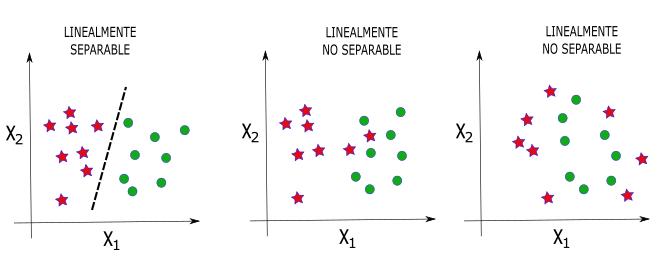

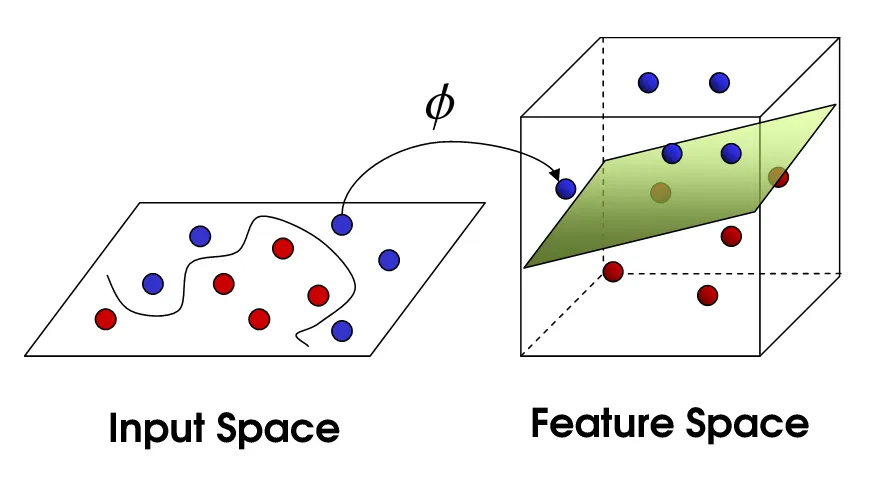

Imagen tomada de: https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f

En este tipo de clasificación da muy buenos resultados para el Perceptrón Simple usar la combinación función de activación **Sigmoide** con función de pérdida la **Binary-Cross-Entropy** (BCE). La actualización de pesos se implementa vía backpropagation con el gradiente descendente.
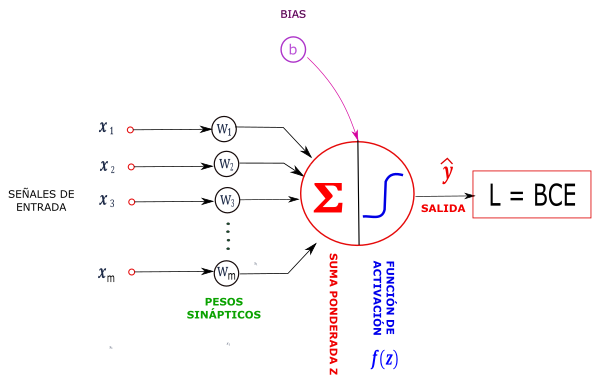

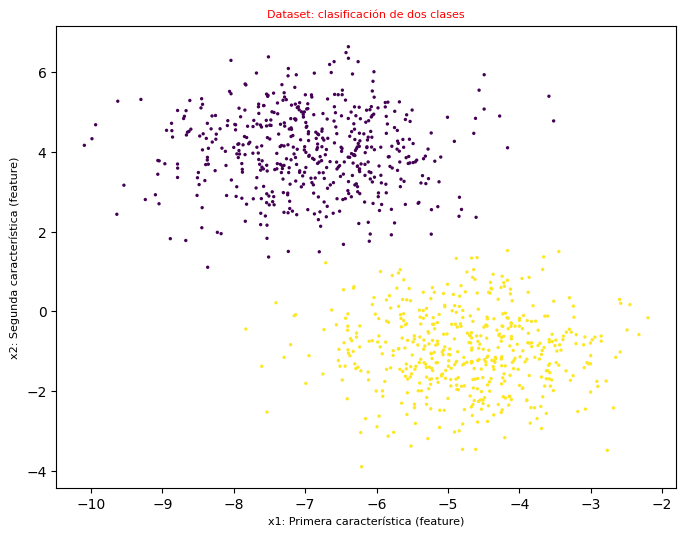

In [ ]:
#app_6.1
import numpy as np
#paquete para desplegar plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

"""
importar el dataset
"""
np.random.seed(122)
X,y = make_blobs(n_samples=1000,centers=2)


"""
Graficar los datos
"""
def visualizar():#graficar los datos
   fig = plt.figure(figsize=(8,6))
   plt.scatter(X[:,0], X[:,1], c=y, s=2)
   plt.title("Dataset")
   plt.xlabel('x1: Primera característica (feature)', fontsize=8)
   plt.ylabel('x2: Segunda característica (feature)', fontsize=8)
   plt.title("Dataset: clasificación de dos clases", fontsize=8)
   plt.show()

visualizar( )

Auscultar un poco el contenido y las formas de los examples del dataset.

In [ ]:
#formas (shape)
print("Forma (shape) de X = ", np.shape(X))
print("Forma (shape) de y = ", np.shape(y))
#desplegar el valor del contenido de X
print("X = ", X[:])
#desplegar el valor del contenido de y
print("y = ", y[:])
#desplegar el valor (X,y) del example 15
print("X[15]  = ", X[15])
print("y[15] = ", y[15])

Forma (shape) de X =  (1000, 2)
Forma (shape) de y =  (1000,)
X =  [[-6.15816232  3.98224018]
 [-5.41637786  2.71127545]
 [-7.6261365   4.67619049]
 ...
 [-4.24561905 -1.36613557]
 [-6.53366802 -1.23576446]
 [-6.23353    -0.36579391]]
y =  [0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 1 1 1 1

**Preprocesamiento de datos** \
Prepararlos de forma adecuado para un buen análisis.\
 Un punto importante en esta etapa es normalizarlos para que todos estén en un rango de -1 a 1 y no existan problemas (una gran diferencia en escala de los números podría generar problemas al intentar combinar los valores como características durante el modelado).

Normalización de los datos

Forma (shape) de X =  (1000, 2)
X =  [[0.23514128 0.84109902]
 [0.27946793 0.76515027]
 [0.14741988 0.88256726]
 ...
 [0.3494287  0.52149734]
 [0.21270227 0.5292879 ]
 [0.23063755 0.58127453]]


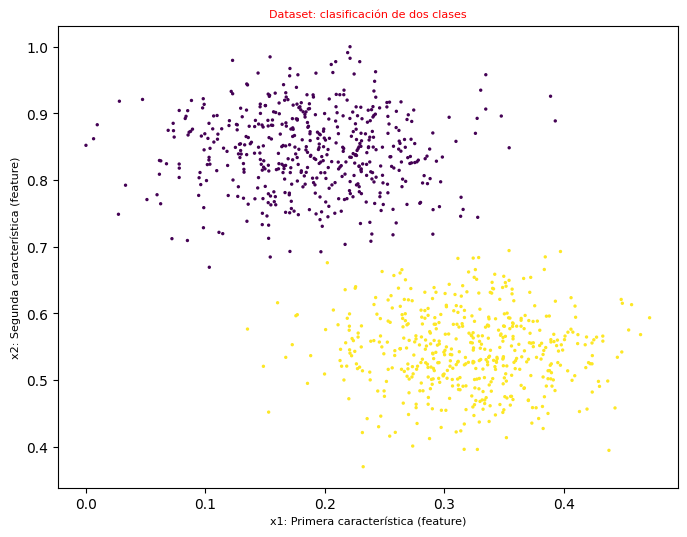

In [ ]:
#NORMALIZACIÓN DE LOS DATOS X
X = (X - np.min(X)) / (np.max(X) - np.min(X))

#formas (shape)
print("Forma (shape) de X = ", np.shape(X))
#desplegar el valor del contenido de X ya normalizado
print("X = ", X[:])

"""
Graficar los datos
"""
def visualizar():

   fig = plt.figure(figsize=(8,6))
   plt.scatter(X[:,0], X[:,1], c=y,s=2)
   plt.title("Dataset")
   plt.xlabel('x1: Primera característica (feature)', fontsize=8)
   plt.ylabel('x2: Segunda característica (feature)', fontsize=8)
   plt.title("Dataset: clasificación de dos clases", fontsize=8)
   plt.show()

visualizar()

In [ ]:
#convertir y a array con una columna
y_true = np.zeros((len(y), 1))
y_true[:,0] = y
print("Nuevo shape de y, se denominó y_true = ", np.shape(y_true))

print("y_true = ", y_true)
print("Elementos deñ 20 al 30 de y_true = ", y_true[20:30,0])

Nuevo shape de y, se denominó y_true =  (1000, 1)
y_true =  [[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

El dataset se divide en un conjunto de entrenamiento y otro de testeo.\
 Se puede hacer manualmente, por ejemplo, tomar el 80% dd las muestras (examples) para entrenamiento y el 20% para testeo, pero se prefirió usar la instrucción de la librería (sklearn) para realizar esta tarea.

Shape de X =  (1000, 2)
Shape de y =  (1000,)
Shape de X_train =  (750, 2)
Shape de y_train =  (750, 1)
Shape de X_test =  (250, 2)
Shape de y_test =  (250, 1)


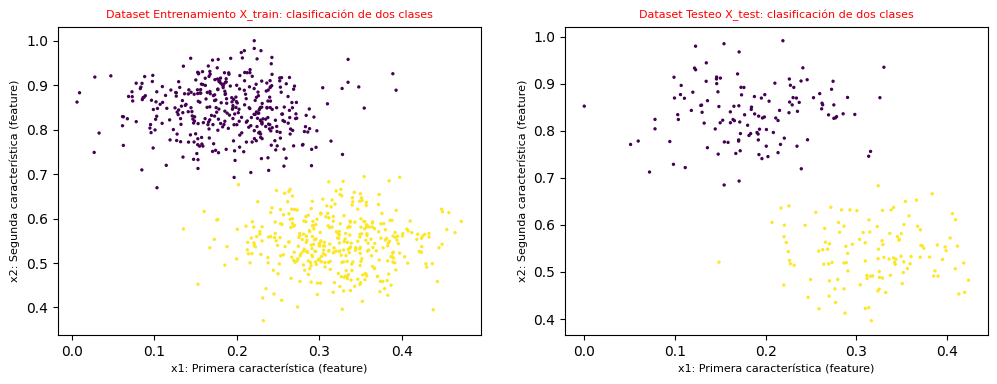

In [ ]:
from sklearn.model_selection import train_test_split

"""

dividir el dataset en dos partes:

"""

X_train, X_test, y_train, y_test = train_test_split(X, y_true)

#indagar sobre los shape de los datos
print("Shape de X = ", np.shape(X))
print("Shape de y = ", np.shape(y))
print("Shape de X_train = ", np.shape(X_train))
print("Shape de y_train = ", np.shape(y_train))
print("Shape de X_test = ", np.shape(X_test))
print("Shape de y_test = ", np.shape(y_test))


"""
Graficar
"""
def visualizar():
   #GRÁFICOS
   #2 gráficos simultaneamente en paneles separados
   fig, axes = plt.subplots(1, 2,figsize=(12, 4))
   ax = axes.ravel()

   #graficar los de entrenamiento
   ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=2)
   ax[0].set_xlabel('x1: Primera característica (feature)', fontsize=8)
   ax[0].set_ylabel('x2: Segunda característica (feature)', fontsize=8)
   ax[0].set_title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=8)

   #graficar los de testeo
   ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=2)
   ax[1].set_xlabel('x1: Primera característica (feature)', fontsize=8)
   ax[1].set_ylabel('x2: Segunda característica (feature)', fontsize=8)
   ax[1].set_title("Dataset Testeo X_test: clasificación de dos clases", fontsize=8)

   plt.show()

visualizar()

In [ ]:
"""
Deplegar la parte del dataset de X_train
entre las posiciones 100:105 de las característics
x1 y x2 y adicionalmente las respectivas etiquetas
(salidas) asociadas.
Para el set de testeo se deseplagarán de 40:50
"""
print("X_train de 100 a 105 de característica x1 = ",X_train[100:105,0])
print("X_train de 100 a 105 de característica x2 = ",X_train[100:105,1])
print("y_train de 100 a 105 = ",y_train[100:105,0])
print("X_test de 40 a 44 de característica x1 = ",X_test[40:44,0])
print("X_test de 40 a 44 de característica x2  = ",X_test[40:44,1])
print("y_test de 40 a 44 = ",y_test[40:44,0])

X_train de 100 a 105 de característica x1 =  [0.24889184 0.24026823 0.30595629 0.2640757  0.20284788]
X_train de 100 a 105 de característica x2 =  [0.76338781 0.91015097 0.54662939 0.82713041 0.81874461]
y_train de 100 a 105 =  [0. 0. 1. 0. 0.]
X_test de 40 a 44 de característica x1 =  [0.19197884 0.27824183 0.30997618 0.14594469]
X_test de 40 a 44 de característica x2  =  [0.78040133 0.82988123 0.52313602 0.91396499]
y_test de 40 a 44 =  [0. 0. 1. 0.]


**Entrenar**


*   Propagación hacia adelante (forwardpropagation):
*   Propagación hacia atrás (backpropagation):
*   Actualzar pesos y BIAS.
*   Repetir los pasos anteriores (épocas) hasta lograr el objetivo.

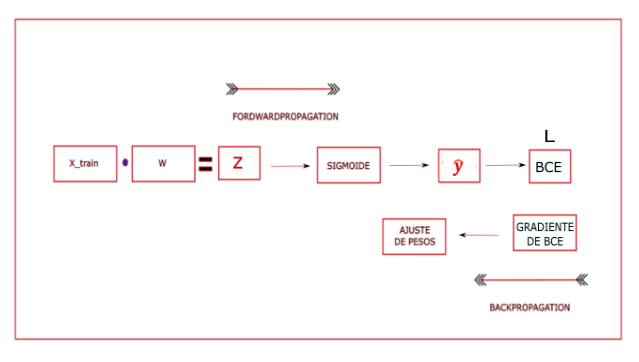
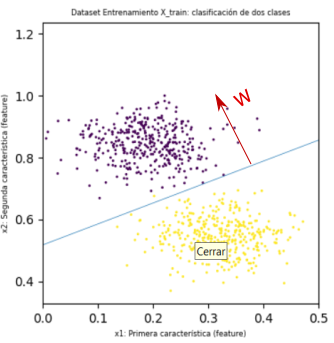




En este ejemplo se escogió como función de activación la función sigmoide, como función de costo (función de pérdida) la función de Binary Cross Entropy para realizar el algoritmo gradiente descendente. Se tomaron 50 épocas y una taza de aprendizaje de 0.1.

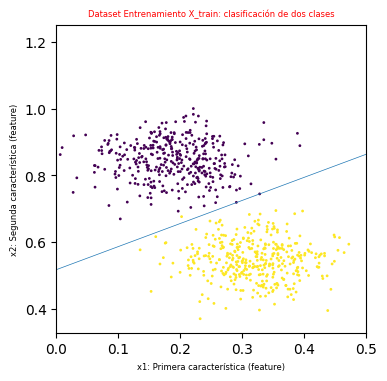

In [ ]:
#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y_train)


#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 2, k =1
#número de características (features)
m = 2
k=1
W = np.zeros((m,k))#dimension 2x1

#bias
#se inicializó en 1
#su forma es una matriz
#de 1 filas y k columnas
#k es el número de neuronas
b = np.ones((1,k))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion
def sigmoide(z):
   y_hat = 1 / (1 + np.exp(-z))
   return y_hat


#L:BCE
def L(y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7) #elimina los valores por fuera del intervalo
    term_0 = y_train * np.log(y_hat + 1e-7)
    term_1 = (1-y_train) * np.log(1-y_hat + 1e-7)
    L_bce = -np.mean(term_0+term_1, axis=0)
    return L_bce


#dL_dz
def dL(y_hat):
      dL_dz = y_hat - y_train
      return dL_dz


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,1))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    BCE = L(y_hat)

    return grad_W.T, grad_b, BCE


"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.1

#número de épcas
epocas = 50

#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = sigmoide(z)
    BCE = L(y_hat)

    return y_hat, BCE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, BCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, BCE

def entrenar(W, b, eta, epocas):
    for i in range(0,epocas):
       #almacenar el valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, BCE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b
    return W, b

W, b  = entrenar(W, b, eta, epocas )

def hiperplano():
    pendiente =  -W[0,0]/W[1,0]
    intercepto =  -b[0,0]/W[1,0]
    x1 = np.linspace(0,1)
    x2 = pendiente * x1 + intercepto
    return x1,x2

def visualizar():
    #graficar los datos
    fig = plt.figure(figsize=(4,4))
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=1)
    plt.xlim(0,0.5)
    x1, x2 = hiperplano()
    plt.plot(x1, x2, '-', linewidth = 0.5)
    plt.xlabel('x1: Primera característica (feature)', fontsize=6)
    plt.ylabel('x2: Segunda característica (feature)', fontsize=6)
    plt.title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=6)
    plt.show()

visualizar()

Veamos con detalle todo lo que sucedió al entrenar la red (el perceptrón).

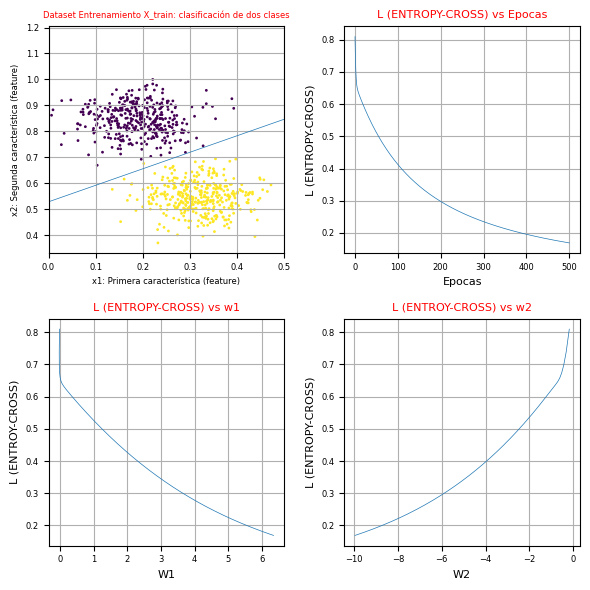

In [ ]:

#dar formato matricial a los examples: vectores columna
#orden nxm X_train y nx1 y_train
#n: número de examples
n = len(y_train)


#Pesos e inicialización de pesos
#matriz capa anterior mxk en donde
#m entradas x y k neuronas de la capa
#aquí m = 2, k =1
#número de características (features)
m = 2
k=1
W = np.zeros((m,k))#dimension 2x1

#bias
#se inicializó en 1
#su forma es una matriz
#de 1 filas y k columnas
#k es el número de neuronas
b = np.ones((1,k))

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""
#función de activacion
def sigmoide(z):
   y_hat = 1 / (1 + np.exp(-z))
   return y_hat


#L:BCE
def L(y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    term_0 = y_train * np.log(y_hat + 1e-7)
    term_1 = (1-y_train) * np.log(1-y_hat + 1e-7)
    L_bce = -np.mean(term_0+term_1, axis=0)
    return L_bce


#dL_dz
def dL(y_hat):
    dL_dz = y_hat - y_train
    return dL_dz


def gradiente_L(y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada es 1 en formato matricial
    dz_db = np.ones((n,1))

    #gradiente_w
    grad_W = np.dot(dL_dz.T,dz_dw)
    #gradiente_b
    grad_b = dL_dz.T@dz_db

    #BCE para ir observando su minimización
    BCE = L(y_hat)

    return grad_W.T, grad_b, BCE


"""
ENTRENAMIENTO
"""
#tasa de aprendizaja
eta =0.001

#número de épcas
epocas = 500


#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W, b):
    #suma ponderada + bias
    z = np.dot(X_train,W) + b
    y_hat = sigmoide(z)
    BCE = L(y_hat)

    return y_hat, BCE

#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, BCE  = gradiente_L(y_hat)
    #print(np.shape(dL_dw))
    return grad_w, grad_b, BCE

def entrenar(W, b, eta, epocas):

    #almacenar el valor de la pérdida
    #para si quiere analizar (gráfica,et...)
    historia_L = []
    historia_w1 = []
    historia_w2 = []

    for i in range(0,epocas):
       #almacenar el valor de la pérdida
       #para si quiere analizar (gráfica,et...)
       #propagar hacia adelante
       y_hat, L = forward_propagation(W,b)

       #propagar hacia atrás
       grad_w, grad_b, BCE = back_propagation(y_hat)

       #actualizar pesos y bias en cada época
       W = W - eta*grad_w
       b = b - eta*grad_b


       #almacenar las historias de L
       historia_L.append(L)
       #almacenar historias de las componentes de W
       historia_w1.append(W[0,0])
       historia_w2.append(W[1,0])

    return W, b, historia_L, historia_w1, historia_w2

W, b, historia_L, historia_w1, historia_w2  = entrenar(W, b, eta, epocas )


def hiperplano():
    pendiente =  -W[0,0]/W[1,0]
    intercepto =  -b[0,0]/W[1,0]
    x1 = np.linspace(0,1)
    x2 = pendiente * x1 + intercepto
    return x1,x2

def visualizar():
   #graficar los datos
   fig, axes = plt.subplots(2, 2,figsize=(6, 6))
   ax = axes.ravel()

   """
   Gráfica de clases separadas
   """
   ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=1)
   ax[0].set_xlim(0,0.5)
   x1, x2 = hiperplano()
   ax[0].plot(x1, x2, '-', linewidth = 0.5)
   ax[0].set_xlabel('x1: Primera característica (feature)', fontsize=6)
   ax[0].set_ylabel('x2: Segunda característica (feature)', fontsize=6)
   ax[0].set_title("Dataset Entrenamiento X_train: clasificación de dos clases", fontsize=6)
   #tamaño de las etiquetas de los ejes
   ax[0].xaxis.set_tick_params(labelsize=6)
   ax[0].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[0].grid(True)

   """
   Gráfica de L vs Epocas
   """
   x = np.linspace(0,epocas,epocas)
   ax[1].plot(x, historia_L, '-', linewidth = 0.5)
   ax[1].set_xlabel('Epocas', fontsize=8)
   ax[1].set_ylabel('L (ENTROPY-CROSS)', fontsize=8)
   ax[1].set_title("L (ENTROPY-CROSS) vs Epocas", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[1].xaxis.set_tick_params(labelsize=6)
   ax[1].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[1].grid(True)

   """
   Gráfica de L vs W1
   """
   ax[2].plot(historia_w1, historia_L, '-', linewidth = 0.5)
   ax[2].set_xlabel('W1', fontsize=8)
   ax[2].set_ylabel('L (ENTROY-CROSS)', fontsize=8)
   ax[2].set_title("L (ENTROPY-CROSS) vs w1", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[2].xaxis.set_tick_params(labelsize=6)
   ax[2].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[2].grid(True)


   """
   Gráfica de L vs W1
   """
   ax[3].plot(historia_w2, historia_L, '-', linewidth = 0.5)
   ax[3].set_xlabel('W2', fontsize=8)
   ax[3].set_ylabel('L (ENTROPY-CROSS)', fontsize=8)
   ax[3].set_title("L (ENTROY-CROSS) vs w2", fontsize=8)
   #tamaño de las etiquetas de los ejes
   ax[3].xaxis.set_tick_params(labelsize=6)
   ax[3].yaxis.set_tick_params(labelsize=6)
   #cuadrícula
   ax[3].grid(True)

   #mejorar la separacion de los subplots
   fig.tight_layout()
   plt.show()
visualizar()

## Clasificación Multiclase usando perceptrones


 En esta nueva implementación, se tendrán tantas **salidas** como clases.\
  Se calcula la salida del modelo de la misma manera que en el caso del Perceptrón de una sola salida. La diferencia es que en la última capa se aplica una función de activación de tipo **Softmax**. Esto dá como resultado una **distribución de probabilidad** sobre todas las clases.\
 Finalmente, se asigna aquella clase que tenga la probabilidad más alta.

 Al aplicar la función Softmax, por cada example ,  se obtienen salidas, una por cada neurona, es decir, una por cada clase a clasificar (debe haber en el modelo Perceptrón Multiclase, tantas neuronas como clases.




Se escogen:\
Función de pérdida: Categorical Cross Entropy (CCE)\
Función de activación a la salida del modelo: Softmax.

Estrictamente hablando la Softmax no es una función de ativación sino una función que actúa en la salida, es decir, en la última capa de una red neuronal (que en este caso es solo una neurona) para convertir la salida en probabilidades.

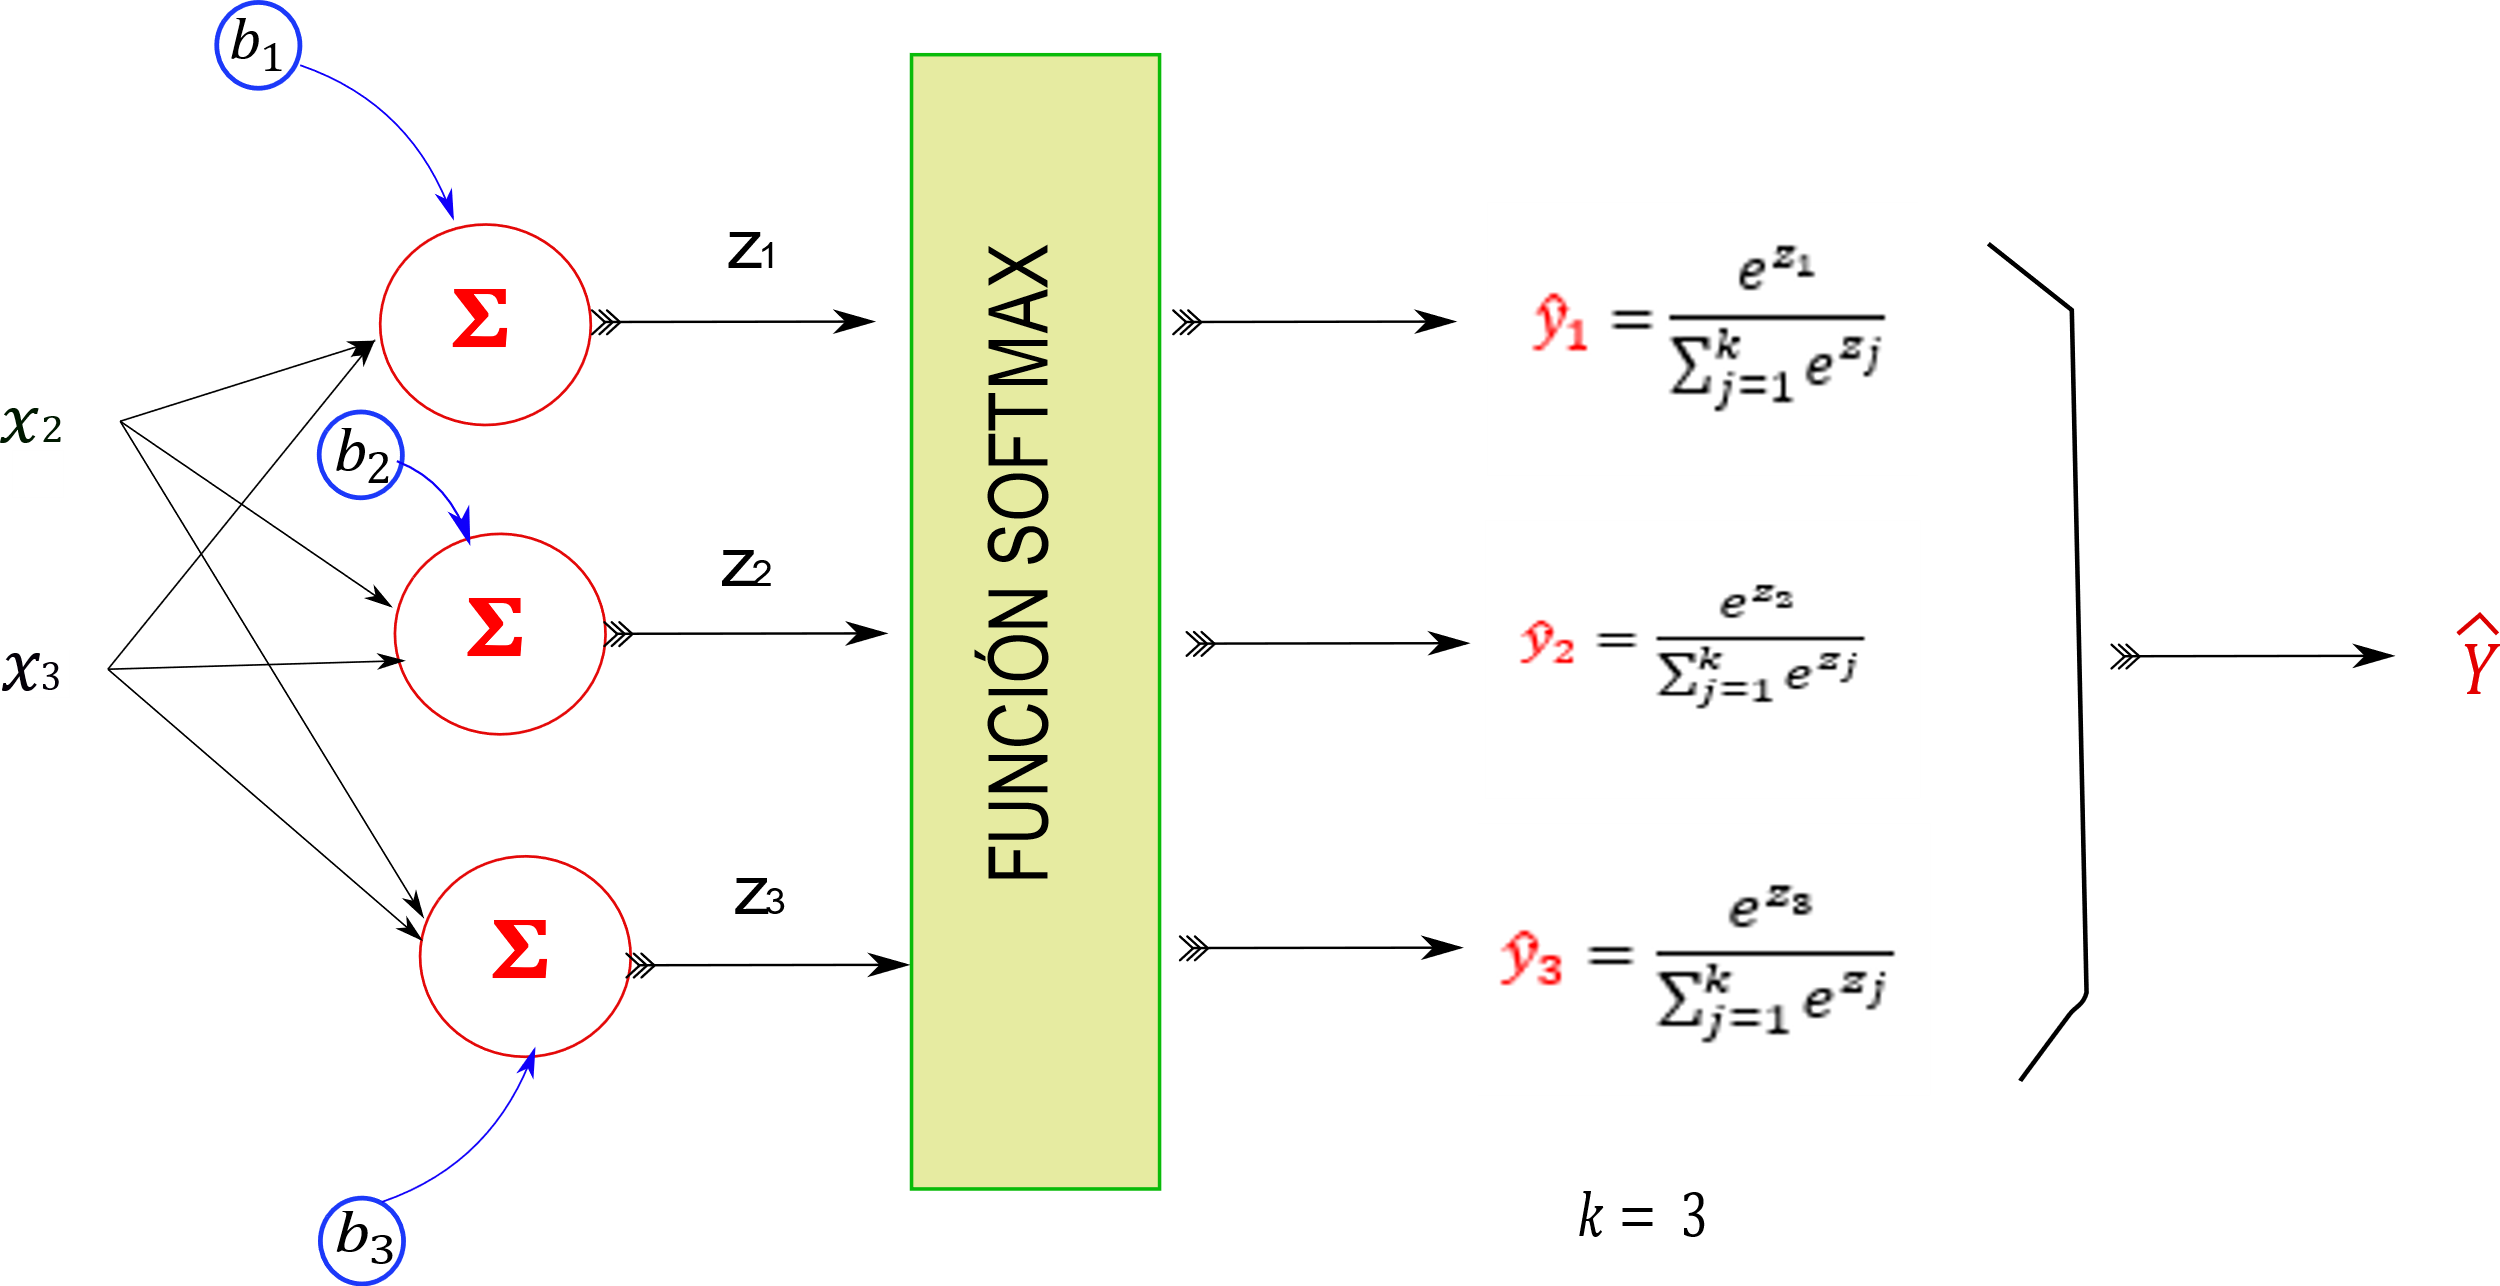

### Implementación del ejemplo

**Dataset**

 Se usará el dataset IRIS, sólo se esogen dos de las cuatro características (features), debido a que la representación en el espacio de éstas (features) es en dos dimensiones. \

Number of Instances: 150 (50 in each of three classes)\
Number of Attributes: 4 numeric,\
predictive attributes and the class\
Attribute Information (se escogen solo 2):\
    - sepal length in cm\
    - sepal width in cm\
    - petal length in cm\
    - petal width in cm\
    class:\
            - Iris-Setosa\
            - Iris-Versicolour\
            - Iris-Virginica

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
"""
importar el dataset
"""
#DATASET

dataset = load_iris()
features = dataset.data
etiquetas = dataset.target

#PREPARACIÓN DEL DATASET PARA EL APRENDIZAJE
#MATRIZ X
print("len(features)",len(features))
print(etiquetas)
print("Sample 100: ", features[100])
print("Primeros 10 samples\n", features[0:9])

len(features) 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Sample 100:  [6.3 3.3 6.  2.5]
Primeros 10 samples
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]]


In [ ]:
#Normalización y one hot Y
#app_7.2
import numpy as np
import pandas as pd

X = np.array(features)
y = np.array(etiquetas)

print("Forma (shape) de X: ",np.shape(X))
print("X sin normalizar (primeros 10)\n",X[0:9])
print("Forma (shape) de y: ",np.shape(y))
print("y etiquetado original = \n", y)

#NORMALIZAR LA MATRIZ X

def normalizarX(X):
   X = (X-np.amin(X))/(np.amax(X)-np.amin(X))
   return X

X = normalizarX(X)

print("X normalizado (primeros 10)\n",X[0:9])

Forma (shape) de X:  (150, 4)
X sin normalizar (primeros 10)
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]]
Forma (shape) de y:  (150,)
y etiquetado original = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X normalizado (primeros 10)
 [[0.64102564 0.43589744 0.16666667 0.01282051]
 [0.61538462 0.37179487 0.16666667 0.01282051]
 [0.58974359 0.3974359  0.15384615 0.01282051]
 [0.57692308 0.38461538 0.17948718 0.01282051]
 [0.62820513 0.44871795 0.16666667 0.01282051]
 [0.67948718 0.48717949 0.20512821 0.03846154]
 [0.57692308 0.42307692 0.16666667 0.02564103]
 [0.62820513 0.42307692 0.17948718 0.01282051]
 

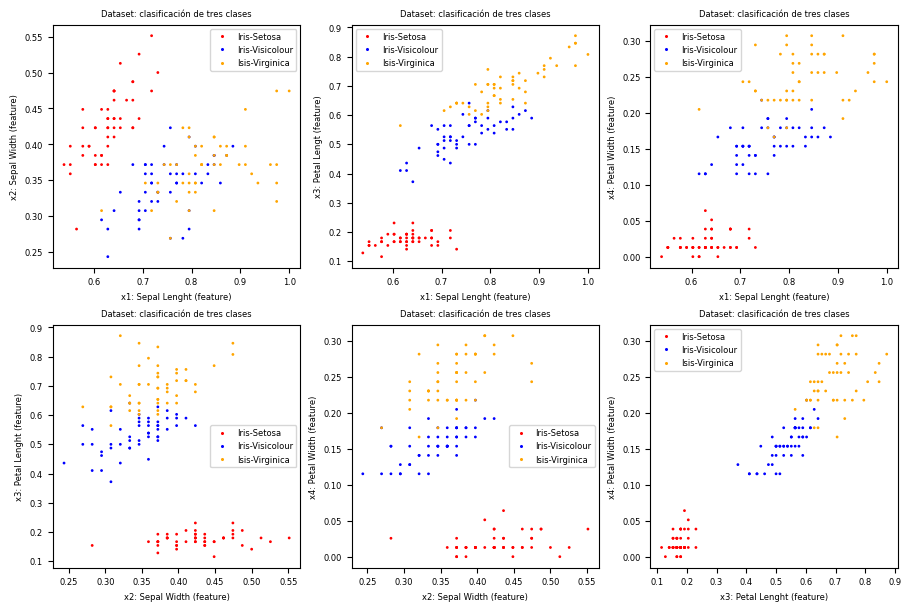

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualizar():

   #graficar los datos
   fig, axes = plt.subplots(2, 3,figsize=(9, 6),constrained_layout = True)
   ax = axes.ravel()

   tamano = 6
   clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
   colores = ListedColormap(['red', 'blue', 'orange'])

   #x2 vs x1
   y_aplanado = y
   scatter = ax[0].scatter(X[:,0], X[:,1],  c = y_aplanado, cmap=colores, s=1)
   ax[0].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax[0].set_ylabel('x2: Sepal Width (feature)', fontsize=tamano)
   ax[0].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[0].xaxis.set_tick_params(labelsize=tamano)
   ax[0].yaxis.set_tick_params(labelsize=tamano)
   ax[0].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=tamano, markerscale=0.2)

   #x3 vs x1
   scatter = ax[1].scatter(X[:,0], X[:,2],c=y_aplanado, cmap=colores, s=1)
   ax[1].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax[1].set_ylabel('x3: Petal Lengt (feature)', fontsize=tamano)
   ax[1].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[1].xaxis.set_tick_params(labelsize=tamano)
   ax[1].yaxis.set_tick_params(labelsize=tamano)
   ax[1].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6, markerscale=0.2)

   #x4 vs x1
   scatter = ax[2].scatter(X[:,0], X[:,3],c=y_aplanado, cmap=colores, s=1)
   ax[2].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax[2].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
   ax[2].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[2].xaxis.set_tick_params(labelsize=tamano)
   ax[2].yaxis.set_tick_params(labelsize=tamano)
   ax[2].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6, markerscale=0.2)

   #x3 vs x2
   scatter = ax[3].scatter(X[:,1], X[:,2],c=y_aplanado, cmap=colores, s=1)
   ax[3].set_xlabel('x2: Sepal Width (feature)', fontsize=tamano)
   ax[3].set_ylabel('x3: Petal Lenght (feature)', fontsize=tamano)
   ax[3].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[3].xaxis.set_tick_params(labelsize=tamano)
   ax[3].yaxis.set_tick_params(labelsize=tamano)
   ax[3].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6, markerscale=0.2)

   #x4 vs x2
   scatter = ax[4].scatter(X[:,1], X[:,3],c=y_aplanado, cmap=colores, s=1)
   ax[4].set_xlabel('x2: Sepal Width (feature)', fontsize=tamano)
   ax[4].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
   ax[4].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[4].xaxis.set_tick_params(labelsize=tamano)
   ax[4].yaxis.set_tick_params(labelsize=tamano)
   ax[4].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6, markerscale=0.2)

   #x4 vs x3
   scatter = ax[5].scatter(X[:,2], X[:,3],c=y_aplanado, cmap=colores, s=1)
   ax[5].set_xlabel('x3: Petal Lenght (feature)', fontsize=tamano)
   ax[5].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
   ax[5].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax[5].xaxis.set_tick_params(labelsize=tamano)
   ax[5].yaxis.set_tick_params(labelsize=tamano)
   ax[5].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6, markerscale=0.2)

   plt.show()


visualizar()

Lo que hemos hecho:


*   Perceptrón para regresión
*   perceptrón clasificación
*   Perceptrones para clasificación multiclase (hoy)
*   Primer ejemplo red multicapa MLP (hoy).






Nuestro ejemplo:
Features x2,x3

Forma (shape) de y:  (150,)
y etiquetado original = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Forma (shape) de X:  (150, 2)
X sin normalizar (primeros 10)
 [[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]]
X normalizado (primeros 10)
 [[0.42372881 0.06779661]
 [0.33898305 0.06779661]
 [0.37288136 0.05084746]
 [0.3559322  0.08474576]
 [0.44067797 0.06779661]
 [0.49152542 0.11864407]
 [0.40677966 0.06779661]
 [0.40677966 0.08474576]
 [0.3220339  0.06779661]]


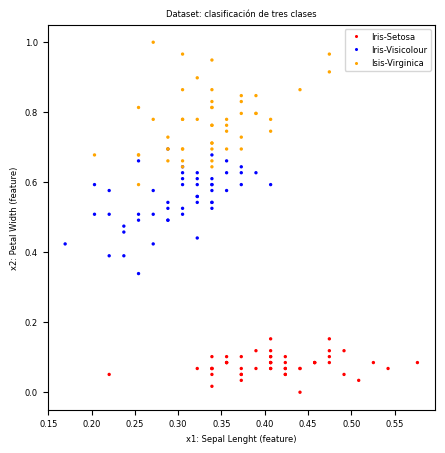

In [ ]:
import numpy as np
import pandas as pd
y_aplanado = y
#SELECCIONAR FEATURES X2 (sepal width) Y X3(petal lenght): m=2
#AQUI YA SE PASARÁN A SER X1 Y X2
X = np.array(features[:,1:3])

# Guardar en np.arrays.
X = np.array(X)
y = np.array(etiquetas)
print("Forma (shape) de y: ",np.shape(y))
print("y etiquetado original = \n", y)
print("Forma (shape) de X: ",np.shape(X))
print("X sin normalizar (primeros 10)\n",X[0:9])

#NORMALIZAR LA MATRIZ X
def normalizarX(X):
   X = (X-np.amin(X))/(np.amax(X)-np.amin(X))
   return X
X = normalizarX(X)

print("X normalizado (primeros 10)\n",X[0:9])

def visualizar():

   #graficar los datos
   fig, ax =  plt.subplots(figsize=(5, 5))
   tamano = 6
   clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
   colores = ListedColormap(['red', 'blue', 'orange'])
   #x2 vs x1
   scatter = ax.scatter(X[:,0], X[:,1],  c = y_aplanado, cmap=colores, s=2)
   ax.set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax.set_ylabel('x2: Petal Width (feature)', fontsize=tamano)
   ax.set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax.xaxis.set_tick_params(labelsize=tamano)
   ax.yaxis.set_tick_params(labelsize=tamano)
   ax.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=tamano, markerscale=0.2)

   plt.show()


visualizar()

Dividir el dataset 80% Entrenamiento Y 20% Testeo

X_train[0:4]:  [[0.3220339  0.59322034]
 [0.20338983 0.50847458]
 [0.28813559 0.72881356]
 [0.40677966 0.77966102]] 
 X_test[0:4]: [[0.25423729 0.50847458]
 [0.45762712 0.08474576]
 [0.44067797 0.06779661]
 [0.3220339  0.61016949]] 
 y_train[0:4]: [1 1 2 2] 
 y_test[0:4]: [1 0 0 1]


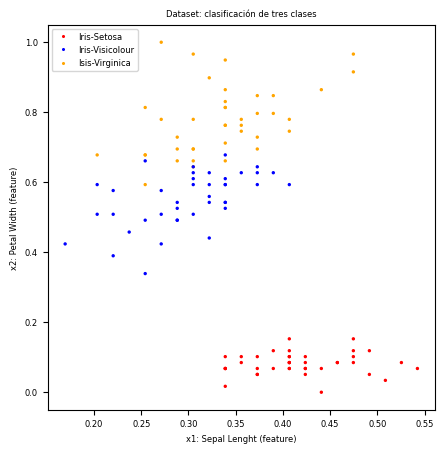

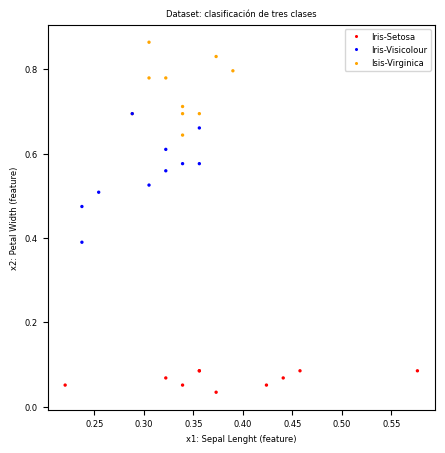

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

#SEPARACION DEL DATASEt EN DOS: 80% ENTRENAMINETO Y 20% TESTEO
"""
random_state = 21 (un entero -asegura repetir la selección aletoria-)
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

print("X_train[0:5]: ",X_train[0:5],"\n","X_test[0:5]:",X_test[0:5],"\n","y_train[0:5]:", y_train[0:5],"\n","y_test[0:5]:", y_test[0:5])
"""
GRAFICAR
"""
def visualizar(X,y):

   #graficar los datos
   fig, ax =  plt.subplots(figsize=(5, 5))

   tamano = 6
   clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
   colores = ListedColormap(['red', 'blue', 'orange'])
   y_aplanado = y
   #x2 vs x1
   scatter = ax.scatter(X[:,0], X[:,1],  c = y_aplanado, cmap=colores, s=2)
   ax.set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax.set_ylabel('x2: Petal Width (feature)', fontsize=tamano)
   ax.set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax.xaxis.set_tick_params(labelsize=tamano)
   ax.yaxis.set_tick_params(labelsize=tamano)
   ax.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=tamano, markerscale=0.2)

   #plt.show()


visualizar(X_train,y_train)

visualizar(X_test,y_test)

plt.show()


### Entrenamiento




Repetir Durante 200 épocas:
1.   Forward: Propagación hacia adelante.
2.   Backward.
3.   Actualizar pesos

Función de costo: Categorical cross entropy (CCE).\
con taza de aprendizaje de 0.2.\
Graficar.







In [ ]:
print(X_train.shape)
# número de neuronas
k = 3
# m es el número de características
# n es el número de examples de entrenamiento
n, m = X_train.shape

# m = 2 entradas x y k = 3 neuronas de la capa

W = np.zeros((m ,k))      #(2,3)
b = np.ones((1,k))        #(1,3)
print("W inicial:\n", W)
print("b inicial:\n", b)

(120, 2)
W inicial:
 [[0. 0. 0.]
 [0. 0. 0.]]
b inicial:
 [[1. 1. 1.]]


Función de Costo =  1.0986122883681095
Función de Costo =  0.9244149171021723
Función de Costo =  4.537248894357801
Función de Costo =  2.4252294976780244
Función de Costo =  6.326273313149991
Función de Costo =  3.9633426507935283
Función de Costo =  3.5509292146845777
Función de Costo =  3.261865880915798
Función de Costo =  5.550050336639166
Función de Costo =  1.6022306566333908
Función de Costo =  5.8240274344371015
Función de Costo =  1.146052409949694
Función de Costo =  5.837216250167781
Función de Costo =  0.9115978250118523
Función de Costo =  5.440259879935685
Función de Costo =  1.1096207843604593
Función de Costo =  5.593555149248815
Función de Costo =  0.8052638309399206
Función de Costo =  4.702411337185181
Función de Costo =  1.5760674802494976
Función de Costo =  5.649266883947305
Función de Costo =  0.587679081022044
Función de Costo =  2.579187053768732
Función de Costo =  4.41484801104337
Función de Costo =  6.853709322968308
Función de Costo =  1.3567555017599873
F

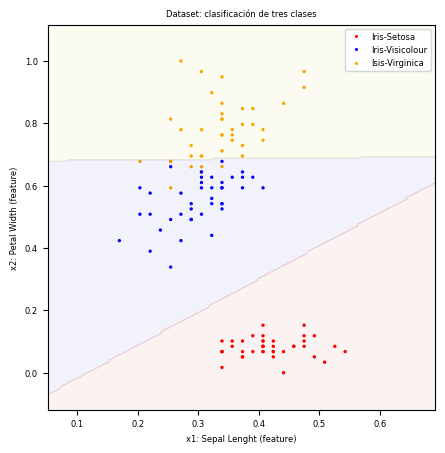

In [ ]:
#y_train_onehot, y_test_onehot
def one_hot(y):
   y1 = np.zeros((len(y),3))
   for i in range(len(y)):
      if(y[i] == 0):
         y1[i,0] = 1
      elif (y[i] == 1):
         y1[i,1] = 1
      elif (y[i] == 2):
         y1[i,2] = 1
   return y1
y_train = one_hot(y_train)
y_test = one_hot(y_test)

"""
FUNCIONES Y SUS DERIVADAS
NECESARIAS PARA EL ENTRENAMIENTO
"""

#función de activación

def softmax(z):
    #aplicando softmax: sum sobre columnas
    y_hat =np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
    return y_hat

#FUNCIÓN DE COSTO ENTROPY-CROSS (CCE)
def L(y_hat):
    epsilon = 1e-10
    L_cce = -np.mean(np.sum(y_train*np.log(y_hat + epsilon), axis=1))
    return L_cce


#dL_dz
def dL(y_hat):
   dL_dz = y_hat - y_train
   return dL_dz

#GRADIENTE DE LA FUNCIÓN DE COSTO
def gradiente_L (y_hat):
    dL_dz = dL(y_hat)
    dz_dw = X_train
    #la derivada dz_db es 1
    dz_db = np.ones((1,n))
    #gradiente_w
    #grad_W = np.dot(dL_dz.T,dz_dw)
    grad_W = dL_dz.T@dz_dw
    #gradiente_b
    grad_b = dz_db@dL_dz

    #CCE para ir observando su minimización
    CCE = L(y_hat)
    return grad_W.T, grad_b, CCE


"""
ENTRENAMIENTO
"""
#taza de aprendizaje
eta = 0.2
epocas = 200


#PROPAGACIÓN HACIA ADELANTE
def forward_propagation(W,b):
    z = np.dot(X_train,W) + b
    y_hat = softmax(z)
    CCE = L(y_hat)
    return y_hat,CCE


#PROPAGACIÓN HACIA ATRÁS
def back_propagation(y_hat):
    #gradiente de la función de pérdida
    grad_w, grad_b, CCE  = gradiente_L(y_hat)
    return grad_w, grad_b, CCE


def entrenar(W, b, eta, epocas ):

     for i in range(0,epocas):
           #propagar hacia adelante
           y_hat, L = forward_propagation(W,b)

           #propagar hacia atrás
           grad_w, grad_b, BCE = back_propagation(y_hat)

           #actualizar pesos y bias en cada época
           W = W - eta*grad_w
           b = b - eta*grad_b

           print("Función de Costo = ",L)

     return W, b


W, b = entrenar(W, b, eta, epocas)

print("W", W)
print("b", b)

def predecir(X, W,b):
        z = np.dot(X,W) + b
        y_hat_rejilla= softmax(z)                            # nos da la probabilidad para cada clase
        y_hat_rejilla = np.argmax(y_hat_rejilla, axis = 1)   # nos da la clase con mayor probabilidad

        return y_hat_rejilla


"""
GRAFICAR
"""

fig, ax =  plt.subplots(figsize=(5, 5))
def visualizar(X,y):


   tamano = 6
   clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
   colores = ListedColormap(['red', 'blue', 'orange'])
   """
   Aplanar Y en vector columna con valores que identifiquen
   las clases: Aquí se optón por valors 0, 1 y 2
   [1 0 0] pasa a [0]
   [0 1 0] pasa a [1]
   [0 0 1] pasa a [2]
   """
   y_aplanado = np.argmax(y,axis=1)
   #x2 vs x1
   scatter = ax.scatter(X[:,0], X[:,1],  c = y_aplanado, cmap=colores, s=2)    #X[:,0] es la primera coordenada de cada punto, X[:,1] la segunda
   ax.set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax.set_ylabel('x2: Petal Width (feature)', fontsize=tamano)
   ax.set_title("Dataset: clasificación de tres clases", fontsize=tamano)
   #tamaño de las etiquetas de los ejes
   ax.xaxis.set_tick_params(labelsize=tamano)
   ax.yaxis.set_tick_params(labelsize=tamano)
   ax.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=tamano, markerscale=0.2)


   visualizar_region_decision(W, b)


#VISUALIZAR REGIÓN DE DECISIÓN
def visualizar_region_decision(W,b):

         margen = 0.2*np.max(X_train[0:1])
         x_min = np.amin(X[:,0]) - margen
         x_max = np.amax(X[:,0]) + margen
         y_min = np.amin(X[:,1]) - margen
         y_max = np.amax(X[:,1]) + margen
         """
         armar rejilla de paso h
         de ancho x_max - x_min
         de alto y_max - y_min
         """
         h = 0.005
         xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))   #

         """
         Aplanar xx para que quede de una sola dimensión: xx.ravel()
         Aplanar yy para que quede de una sola dimensión: yy.ravel()
         """
         A = xx.ravel()
         B = yy.ravel()

         """
         Cambiar las formas de A y B y
         luego concatenarlas para coformar
         la matriz X con las dimensiones
         de X_train para poder hacer la
         representación en la rejilla con
         la dimesnionalidad de X_train
         """
         A = A.reshape(len(A),1)
         B = B.reshape(len(B),1)
         X_input = np.concatenate((A,B), axis=1)

         """
         Obtener la predicción con el hiperplano
         """
         y_hat_rejilla = predecir(X_input,W,b)

         """
         Regresar a forma bidimensional original
         para vaciar en la rejilla bidimensional las
         predicciones. Esto marca (colorea) las dos
         regiones
         """
         Z = y_hat_rejilla.reshape(xx.shape)


         """
         Dos clases entonces dos colores: dos regiones
         """
         alpha = 0.05
         colores = [(0.7, 0.0, 0.0, alpha),
                   (0.0, 0.0, 0.7, alpha),
                   (0.7, 0.7, 0.0, alpha)]


         cmap = ListedColormap(colores)
         ax.contourf(xx, yy, Z, cmap=cmap)



visualizar(X_train,y_train)


plt.show()

### Testing

In [ ]:
eta = 0.2
epocas = 200
W,b = entrenar(W, b, eta, epocas)
def testear(W,b):
    z = np.dot(X_test,W) + b
    y_hat = softmax(z)
    #encontrar el índice (posición) del valor máximo
    #esto da información sobre cuál es la clase predicha
    indice_y_test_max = np.argmax(y_test, axis = 1)
    print(indice_y_test_max)
    indice_y_hat_max = np.argmax(y_hat, axis = 1)
    print(indice_y_hat_max)
    #cálculo accuracy comparando
    acertacion = 100*np.sum(indice_y_hat_max == indice_y_test_max)/len(indice_y_test_max)
    print ("accuracy % =", acertacion)


testear(W,b)

Función de Costo =  0.17443963030054194
Función de Costo =  0.16826888161535988
Función de Costo =  0.1676439705440504
Función de Costo =  0.16201497358122083
Función de Costo =  0.16086553109615206
Función de Costo =  0.1557310760103244
Función de Costo =  0.15415712695964343
Función de Costo =  0.1494796507572236
Función de Costo =  0.14758588461442637
Función de Costo =  0.14333828624389305
Función de Costo =  0.14123220342746917
Función de Costo =  0.1373973881830032
Función de Costo =  0.1351860033118708
Función de Costo =  0.13175478746112287
Función de Costo =  0.12953977754438856
Función de Costo =  0.12650717846306705
Función de Costo =  0.12437889279701947
Función de Costo =  0.12173941544596943
Función de Costo =  0.11977083265383924
Función de Costo =  0.11751389062197175
Función de Costo =  0.11575605688485686
Función de Costo =  0.11386280178766274
Función de Costo =  0.11234312026042037
Función de Costo =  0.11078552752759648
Función de Costo =  0.10950942092895467
Funci

## Implementación del modelo usando librerías
sklearn.linear_model

Accuracy = 0.9


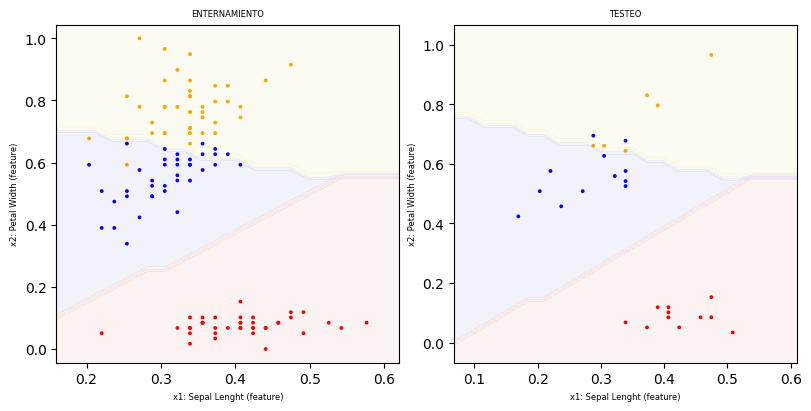

In [ ]:
#app_7.9
import numpy as np
import pandas as pd
#paquete para desplegar plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as ms

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


"""
ENRENAMIENTO CON EL USO DEL MODELO SGD
DE LA LIBRERÍA sklearn.linear_model
SGD: GRADIENTE ESTOCÁSTICO DESCENDENTE
"""
modelo_clasificador = SGDClassifier(alpha=0.001, max_iter=100, random_state=21).fit(X_train, y_train)
#LISTO EL ENTRENAMIENTO

"""
TESTEO
"""
predictions = modelo_clasificador.predict(X_test)
accuracy = ms.accuracy_score(y_test,predictions)
print("Accuracy =", accuracy)
#LISTO EL TESTEO

"""
VISUALIZAR LOS RESULTADOS
"""


"""
GRAFICAR
"""

#graficar los datos
fig, axes = plt.subplots(1, 2,figsize=(8, 4),constrained_layout = True)
ax = axes.ravel()


def visualizar(X,Y,ax,titulo):
   tamano = 6
   clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
   colores = ListedColormap(['red', 'blue', 'orange'])
   #x2 vs x1
   scatter = ax.scatter(X[:,0], X[:,1],  c = Y, cmap=colores, s=3)
   ax.set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
   ax.set_ylabel('x2: Petal Width (feature)', fontsize=tamano)
   ax.set_title(titulo, fontsize=tamano)
   visualizar_region_decision(X,ax)


#VISUALIZAR REGIÓN DE DECISIÓN
def visualizar_region_decision(X,ax):
   margen = 0.2*np.max(X[0:1])
   x_min = np.amin(X[:,0]) - margen
   x_max = np.amax(X[:,0]) + margen
   y_min = np.amin(X[:,1]) - margen
   y_max = np.amax(X[:,1]) + margen

   ax.set_ylim(y_min, y_max)
   ax.set_xlim(x_min, x_max)
   alpha = 0.05
   colores = [(0.7, 0.0, 0.0, alpha),
               (0.0, 0.0, 0.7, alpha),
               (0.7, 0.7, 0.0, alpha)]

   cmap = ListedColormap(colores)
   DecisionBoundaryDisplay.from_estimator(modelo_clasificador, X, cmap=cmap, ax=ax,response_method="predict")

titulo = "ENTERNAMIENTO"
visualizar(X_train,y_train,ax[0],titulo)

titulo = "TESTEO"
visualizar(X_test,y_test,ax[1],titulo)

plt.show()

# Perceptrón multicapa
 En este módulo se
tratará una MLP simple, sólo tendrá una sola capa oculta. Primero se usará para una regresión
cadrática y luego para una clasificación entre tres clases que incluso podrían ser linealmente
no separables.

### Ejemplo MLP *regresión*

X_train
 [[ 2.93406908]
 [ 0.29726836]
 [-1.31131619]
 [-2.5362626 ]
 [-0.33318302]
 [-0.16315218]
 [-2.70886799]
 [-2.02005331]
 [-2.30429573]
 [ 0.7643501 ]
 [ 2.13709229]
 [ 0.90061453]
 [ 2.94433011]
 [-0.17789551]
 [ 0.7097669 ]
 [-1.30399676]
 [ 2.85601989]
 [ 1.03840799]
 [-0.35681467]
 [-1.26187596]
 [ 0.0581981 ]
 [-2.32523463]
 [-1.63827126]
 [-0.12868617]
 [-1.54345106]
 [-0.67210489]
 [ 1.91324057]
 [-2.55275529]
 [ 2.53889723]
 [-1.65062351]
 [ 1.23822891]
 [-2.33660726]
 [ 0.60602474]
 [-0.55924477]
 [ 2.0209767 ]
 [-1.49981743]
 [-0.25357205]
 [ 0.34459622]
 [-1.4882988 ]
 [-2.33855207]
 [ 1.35982318]
 [-1.13955637]
 [ 1.95452379]
 [-0.29000084]
 [-2.43516643]
 [ 2.32321943]
 [ 1.45052477]
 [-2.26840635]
 [ 2.13521443]
 [-2.59837037]
 [-1.89628808]
 [-1.9669991 ]
 [ 2.53366786]
 [ 0.99799483]
 [-1.46965947]
 [-1.49210248]
 [ 2.90421939]
 [ 1.07277225]
 [-0.5857723 ]
 [-2.61496622]
 [-0.33675524]
 [-1.75745023]
 [-1.06446028]
 [ 0.8969157 ]
 [ 1.34407423]
 [-0.19000502]
 

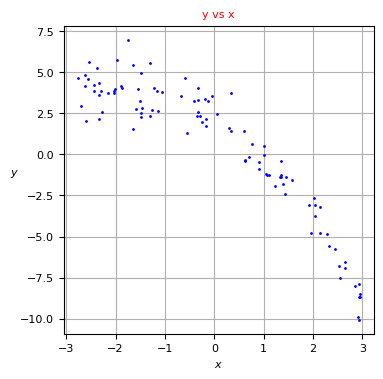

In [ ]:
#ejemplo 8_1
import matplotlib.pyplot as plt
import numpy as np
#número de muestras (samples)
n = 100
#número de características
m = 1
#número de neuronas capa oculta
k1 = 3
#número de neuronas capa salida
k2 = 1
#GENERAR LOS DATOS DEL EJEMPLO
"""
random.seed mantiene el conjunto generado
para la repetibilidad
"""
np.random.seed(45)
x = 6 * np.random.rand(n, 1) - 3
y = - 0.5 * x**2 - 2*x + 2 + np.random.randn(n, 1)
#ORGANIZANDO EL DATASET
"""
Convertir x a un array
X_train dimension nxm
m=1, n=100
"""
X_train = np.array(x)
"""
#Convertir y en array
#Y_train dimensión nx1
#n=1
"""
y_train = np.array(y)
print("X_train\n",X_train)
print("y_train\n",y_train)
#GRAFICAR
def visualizar():
 fig, ax = plt.subplots(figsize=(4, 4))
 #gráfica predicha
 xx = np.linspace(-3, 3, 100)
 x1 = np.array(xx).reshape(len(xx),1)
 #gráfica dataset
 ax.plot(x, y, "b.",markersize= 2)
 plt.yticks(fontsize=8)
 plt.xticks(fontsize=8)
 plt.xlabel("$x$", fontsize=8)
 plt.ylabel("$y$", rotation=0, fontsize=8)
 plt.rc('text', color='red')
 ax.set_title("y vs x", fontsize=8)
 plt.grid(True)
 plt.show()
visualizar()

Se usará una capa profunda con 3 neuronas

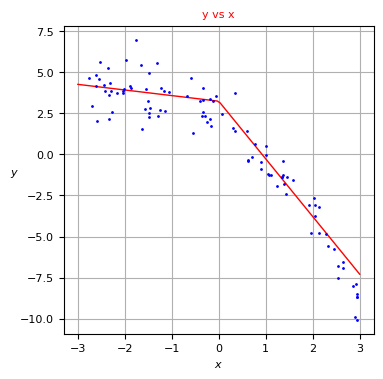

In [ ]:
#INICIALIZANDO MATRICES DE PESOS
#aleatoriamente
def generar_W(filas, columnas):
  B =[]
  for i in range(filas * columnas):
    B.append(np.random.randn(filas * columnas))
    W=(np.array(B).reshape(filas, columnas))
    return W

"""
Matriz de pesos entrada a capa oculta:
"""
W1= generar_W(m,k1)
"""
Matriz de pesos entrada a capa salida:
"""
W2= generar_W(k1,k2)
#bias
#se inicializó en 1
#capa oculta
b1= np.ones((1,k1))
#dapa salida
b2=np.ones((1,k2))
"""
ACTIVACIÓN
"""
#Capa de salida: Identidad
def identidad(z):
 return z
#Derivada de la función identidad
def d_identidad(z):
 return 1
#Capa oculta: ReLU
def relu(z):
 return np.maximum(0, z)
 #Derivada de la función ReLu
def d_relu(z):
 return z>0
#Función Costo MSE
def L(y_hat):
 MSE= pow((y_hat- y_train),2).mean()
 return MSE

#Derivada de la función de costo
#respecto a z2: dL_dz2
def dL(y_hat):
 dL_dy=(2/n)*(y_hat- y_train)
 return dL_dy
"""
FORWARD
Debido a que el proceso es de regresión se usará como función de pérdida el
MSE y como función de activación a la salida la identidad
"""
#Solo hay una característica y n samples
def forward(W1, W2, b1, b2):
 #entrada a capa oculta
 z1= np.dot(X_train,W1)+ b1
 #salida de activación de capa oculta
 h= relu(z1)

 #entrada a capa salida
 z2= np.dot(h,W2)+ b2
 #salida de la capa salida
 y_hat= z2
 return y_hat, z2, h, z1
"""
BACKWARD
"""
def backward(w1,w2,z1,z2,h,y_hat):
 """
 CAPA SALIDA A CAPA OCULTA
 GRADIENTE W2
 GRADIENTE b2
 """
 #GRADIENTE W2
 dL_dz2= dL(y_hat)
 dz2_dW2= h
 grad_W2= np.dot(h.T, dL_dz2)
 #GRADIENTE b2
 dz2_db2= np.ones((1,n))
 grad_b2= dz2_db2@dL_dz2


 """
 CAPA OCULTA A CAPA ENTRADA
 GRADIENTE W1
 GRADIENTE b1
 """
 #GRADIENTE W1
 dz2_dh= W2
 dL_dh= np.dot(dL_dz2,dz2_dh.T)
 dz1_dW1= X_train
 grad_W1= np.dot(dz1_dW1.T, dL_dh)
 #GRADIENTE b1
 dz1_db1= np.ones((1,n))
 grad_b1= dz1_db1@dL_dh
 return grad_W2, grad_W1, grad_b2, grad_b1
t_a= 0.02
epocas= 250
"""
ENTRENAR
"""
def entrenar(epocas, t_a, W1, W2, b1, b2 ):

  for i in range(0,epocas):
    y_hat, z2, h, z1 = forward(W1,W2, b1, b2)
    grad_W2, grad_W1 , grad_b2, grad_b1 = backward(W1,W2,z1,z2,h,y_hat)

 #actualizar pesos
    W1 = W1 - t_a*grad_W1
    W2 = W2 - t_a*grad_W2
    b1 = b1 - t_a*grad_b1
    b2 = b2 - t_a*grad_b2

  return W1, W2, b1 , b2

W1, W2, b1, b2 = entrenar(epocas , t_a, W1, W2, b1, b2 )

def predict(x):
 h = relu(np.dot(x, W1)) + b1
 #activación identidad
 y_hat = identidad(np.dot(h, W2) + b2)
 return y_hat
 """
GRAFICAR
 """
def visualizar():
 fig, ax = plt.subplots(figsize=(4, 4))
 #gráfica predicha
 xx = np.linspace(-3, 3, 100)
 x1 = np.array(xx).reshape(len(xx),1)
 y_hat = predict(x1)
 ax.plot(x1, y_hat, "r",linewidth=1, linestyle="-")
 ##gráfica dataset
 ax.plot(x, y, "b.",markersize= 2)
 plt.yticks(fontsize=8)
 plt.xticks(fontsize=8)
 plt.xlabel("$x$", fontsize=8)
 plt.ylabel("$y$", rotation=0, fontsize=8)
 plt.rc('text', color='red')
 ax.set_title("y vs x", fontsize=8)
 plt.grid(True)
 plt.show()
visualizar()

Tarea:


*   Jugar un poco con los parámetros de la red en [Tensorflow_playground
](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.93810&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


# Referencias


*   Diego Luis Aristizabal, Machine Learning: Auscultando las Redes Neuronales con python, Manipulación de datos (módulo 3).
*   W3 Schools. Matplotlib Pyplot. Scatter y Plot. URL.[En línea]. Recuperado de https://www.w3schools.com/python/matplotlib_pyplot.asp [Consultado en septiembre de 2023].
*   Deisenroth, M.P. , Faisal A.A., Soon C. (2021). MATHEMATICS for MACHNE
LEARNING . Cambridge University Press.
*   VanderPlas, J., (2016). Python Data Science Handbook. O´RELLY.
*   Zhang, Aston and Lipton, Zachary C. and Li, Mu and Smola, Alexander J. (2023). DIVE
INTO DEEP LEARNING. Cambridge University Press.
*   Johansson, R. (2019). Numerical Python. Scientific Computing and Data Science.
Aplications with NumPy, SciPy and Matplotlib. Aress.
*   Torres, J. (2020). Python Deep Learning. Introducción práctica con Keras y
TensorFlow 2. Marcombo.
*   Swamynathan, M., (2017). Mastering Machine Learning width Python in Six Steps.
Apress.
*   Shalev, S. and Ben, D (2014). Understanding Machine Learning. Cambridge University
Press.
*   Arggarwal, C. (2023). Neural Networks and Deep Learning. Springer.


